# Divvy Bike Stations dataframe

## 1. Extract
Divvy Bikes
Divvy System Data | Divvy Bikes
Developers, engineers, statisticians and academics can find and download data on Divvy membership, ridership and trip histories.

Raw csv files were obtained from: https://www.divvybikes.com/system-data

- When: Analysis Timeframe: Fiscal Year 09-2016 to 08-2017
- What: Divvy Trip Data
- How (link): https://www.divvybikes.com/system-data
- How (files): 2016 Q3 & Q4 DATA; 2017 Q1 & Q2 DATA; 2017 Q3 & Q4 DATA



In [9]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# Extract Divvy Files
Divvy_Stations_2017_Q3Q4_file = "Divvy_Stations_2017_Q3Q4.csv"
Divvy_Stations_2017_Q1Q2_file = "Divvy_Stations_2017_Q3Q4.csv"
Divvy_Stations_2016_Q4_file = "Divvy_Stations_2016_Q4.csv"
Divvy_Stations_2016_Q3_file = "Divvy_Stations_2016_Q3.csv"

In [10]:
#Read the Station csv files
Divvy_Stations_2016_Q3_df = pd.read_csv(Divvy_Stations_2016_Q3_file)
Divvy_Stations_2016_Q4_df = pd.read_csv(Divvy_Stations_2016_Q4_file)
Divvy_Stations_2017_Q1Q2_df = pd.read_csv(Divvy_Stations_2017_Q1Q2_file)
Divvy_Stations_2017_Q3Q4_df = pd.read_csv(Divvy_Stations_2017_Q3Q4_file)

## 2. Transform
- Divvy Station data from each quarter were merged into one dataframe
- duplicate rows were dropped
- the "id" column was duplicated and named "from_station_id" and "to_station_id" to correspond to the columns in the Divvy Trips dataframe
- dropped unneeded columns with NaN values
- reordered the columns for fun

In [11]:
# add from and to station id columns to make merging easier
Divvy_Stations_2016_Q4_df["from_station_id"] = Divvy_Stations_2016_Q4_df["id"]
Divvy_Stations_2016_Q4_df["to_station_id"] = Divvy_Stations_2016_Q4_df["id"]

Divvy_Stations_2016_Q3_df["from_station_id"] = Divvy_Stations_2016_Q3_df["id"]
Divvy_Stations_2016_Q3_df["to_station_id"] = Divvy_Stations_2016_Q3_df["id"]

Divvy_Stations_2017_Q1Q2_df["from_station_id"] = Divvy_Stations_2017_Q1Q2_df["id"]
Divvy_Stations_2017_Q1Q2_df["to_station_id"] = Divvy_Stations_2017_Q1Q2_df["id"]

Divvy_Stations_2017_Q3Q4_df["from_station_id"] = Divvy_Stations_2017_Q3Q4_df["id"]
Divvy_Stations_2017_Q3Q4_df["to_station_id"] = Divvy_Stations_2017_Q3Q4_df["id"]

In [12]:
# merge all into one dataframe
Divvy_Stations_df = Divvy_Stations_2016_Q4_df.append(Divvy_Stations_2016_Q3_df)
Divvy_Stations_df = Divvy_Stations_df.append(Divvy_Stations_2017_Q1Q2_df)
Divvy_Stations_df = Divvy_Stations_df.append(Divvy_Stations_2017_Q3Q4_df)

/Users/michelelodl/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [13]:
# clean-up (drop duplicate rows, unneeded columns)
Divvy_Stations_df = Divvy_Stations_df.drop_duplicates(subset=["id"])
Divvy_Stations_df = Divvy_Stations_df.drop(columns=['city', 'Unnamed: 7', 'id'])
Divvy_Stations_df = Divvy_Stations_df[['from_station_id', 'to_station_id', 'name', 'latitude', 'longitude', 'dpcapacity', 'online_date']]

In [14]:
Divvy_Stations_df.sort_values('from_station_id', ascending=True)

,from_station_id,to_station_id,name,latitude,longitude,dpcapacity,online_date
357,2,2,Michigan Ave & Balbo Ave,41.872638,-87.623979,35,5/8/2015
456,3,3,Shedd Aquarium,41.867226,-87.615355,31,4/24/2015
53,4,4,Burnham Harbor,41.856268,-87.613348,23,5/16/2015
497,5,5,State St & Harrison St,41.874053,-87.627716,23,6/18/2013
188,6,6,Dusable Harbor,41.885042,-87.612795,31,4/24/2015
210,7,7,Field Blvd & South Water St,41.886349,-87.617517,19,4/18/2015
319,9,9,Leavitt St & Archer Ave,41.828792,-87.680604,19,4/14/2015
265,11,11,Jeffery Blvd & 71st St,41.766638,-87.576450,11,4/22/2015
477,12,12,South Shore Dr & 71st St,41.766409,-87.565688,15,4/22/2015
567,13,13,Wilton Ave & Diversey Pkwy,41.932418,-87.652705,27,6/20/2013


In [8]:
Divvy_Stations_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 584
Data columns (total 7 columns):
from_station_id    586 non-null int64
to_station_id      586 non-null int64
name               586 non-null object
latitude           586 non-null float64
longitude          586 non-null float64
dpcapacity         586 non-null int64
online_date        586 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 36.6+ KB


In [16]:
TEST_Divvy_Stations_df = Divvy_Stations_df.drop(columns=['from_station_id', 'to_station_id','online_date'])
TEST_Divvy_Stations_df 

,name,latitude,longitude,dpcapacity
0,2112 W Peterson Ave,41.991178,-87.683593,15
1,63rd St Beach,41.781016,-87.576120,23
2,900 W Harrison St,41.874675,-87.650019,19
3,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15
4,Aberdeen St & Monroe St,41.880420,-87.655599,19
5,Ada St & Washington Blvd,41.882830,-87.661206,15
6,Adler Planetarium,41.866095,-87.607267,35
7,Albany (Kedzie) Ave & Montrose Ave,41.961041,-87.705866,15
8,Albany Ave & 26th St,41.844475,-87.702013,19
9,Albany Ave & Bloomingdale Ave,41.914027,-87.705126,15


In [25]:
s_df= TEST_Divvy_Stations_df[['latitude','dpcapacity']]
s_df

,latitude,dpcapacity
0,41.991178,15
1,41.781016,23
2,41.874675,19
3,41.877726,15
4,41.880420,19
5,41.882830,15
6,41.866095,35
7,41.961041,15
8,41.844475,19
9,41.914027,15


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [68]:
X = s_df.latitude.values.reshape(-1, 1)
y = s_df.dpcapacity.values.reshape(-1, 1)

In [69]:
print("Shape: ", X.shape, y.shape)

Shape:  (586, 1) (586, 1)


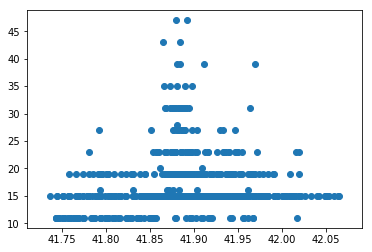

In [70]:
plt.scatter(X, y)

In [71]:
from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

In [72]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[10.07343555]]
y-axis intercept:  [-404.74728134]


In [74]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[41.736646]]
Max X Value: [[42.063999]]


In [75]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

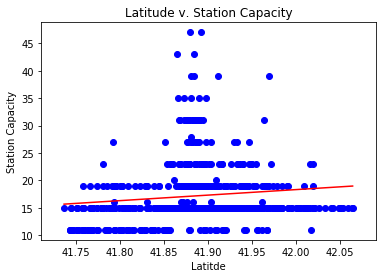

<Figure size 432x288 with 0 Axes>

In [76]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.title("Latitude v. Station Capacity")
plt.xlabel("Latitde")
plt.ylabel("Station Capacity")
plt.show()
plt.savefig('Lat_v_Cap.png')

In [35]:
 from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 30.491195024670056
R-squared (R2 ): 0.014722725314103235


In [38]:
long_df= TEST_Divvy_Stations_df[['longitude','dpcapacity']]
long_df

,longitude,dpcapacity
0,-87.683593,15
1,-87.576120,23
2,-87.650019,19
3,-87.654787,15
4,-87.655599,19
5,-87.661206,15
6,-87.607267,35
7,-87.705866,15
8,-87.702013,19
9,-87.705126,15


In [57]:
X = long_df.longitude.values.reshape(-1, 1)
y = long_df.dpcapacity.values.reshape(-1, 1)

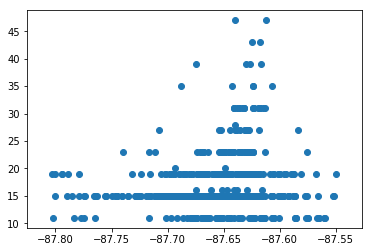

In [58]:
plt.scatter(X, y)

In [59]:
from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Weight coefficients:  [[21.54604058]]
y-axis intercept:  [1905.89095487]
Min X Value: [[-87.80287]]
Max X Value: [[-87.54938625]]


In [60]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

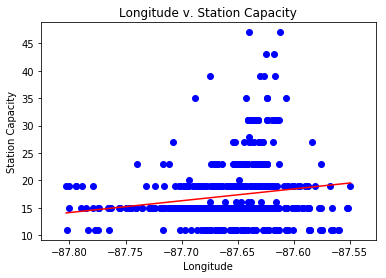

<Figure size 432x288 with 0 Axes>

In [67]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.title("Longitude v. Station Capacity")
plt.xlabel("Longitude")
plt.ylabel("Station Capacity")
plt.show()
plt.savefig('Long_v_Cap.png')

In [46]:
# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 30.074543107320974
R-squared (R2 ): 0.02818620765010904


In [47]:
mult_df= TEST_Divvy_Stations_df[['longitude','latitude','dpcapacity']]
mult_df

,longitude,latitude,dpcapacity
0,-87.683593,41.991178,15
1,-87.576120,41.781016,23
2,-87.650019,41.874675,19
3,-87.654787,41.877726,15
4,-87.655599,41.880420,19
5,-87.661206,41.882830,15
6,-87.607267,41.866095,35
7,-87.705866,41.961041,15
8,-87.702013,41.844475,19
9,-87.705126,41.914027,15


In [50]:
X = mult_df[["longitude", "latitude"]]
y = mult_df["dpcapacity"].values.reshape(-1, 1)
print(X.shape, y.shape)

(586, 2) (586, 1)


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [54]:
### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.0703013102766672
Testing Score: 0.08246787084530705


Text(0.5,1,'Residual Plot')

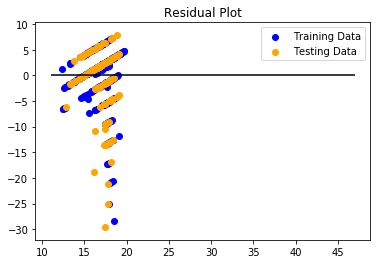

In [55]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")